In [15]:
import pandas as pd
import seaborn as sns
import statsmodels
# from statsmodels.tsa import STL

## 1 
- Загрузите данные о подтвержденных случаях COVID-19 по странам из COVID-19 Data (Johns Hopkins University). 
- Выполните декомпозицию временного ряда для одной из стран с помощью STL, выделив компоненты тренда и сезонности. 
- Оцените влияние тренда на эпидемию.

In [ ]:
df = pd.read_csv('../data/04-1-covid19.csv')
df = df[df['Country/Region']=='Zambia']

df_melt = df.melt(
    id_vars=['Country/Region'],        # эти колонки оставить как есть
    value_vars=df.columns[4:],         # даты начинаются с 5-й колонки (индекс 4)
    var_name='Date',                   # имя новой колонки с датами
    value_name='Value'                 # имя колонки со значениями
)
    
df_melt.sample(5)

,Country/Region,Date,Value
928,Zambia,8/7/22,331358
1033,Zambia,11/20/22,333685
654,Zambia,11/6/21,209869
26,Zambia,2/17/20,0
432,Zambia,3/29/21,88012


In [20]:
# Указываем период сезонности (например, 12, если данные имеют годовую сезонность)
stl = statsmodels.tsa.seasonal.STL(df_melt['Value'], period=12)
result = stl.fit()

# Извлечение компонентов
df_melt['Trend'] = result.trend
df_melt['Season'] = result.seasonal
df_melt['Resid'] = result.resid

df_melt['Date'] = pd.to_datetime(df_melt['Date'])

df_melt.sample(10)

/var/folders/wb/4g8jd0z5523_swmb10tb_k7c0000gn/T/ipykernel_4678/2973225151.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_melt['Date'] = pd.to_datetime(df_melt['Date'])


,Country/Region,Date,Value,Trend,Season,Resid
992,Zambia,2022-10-10,333624,333593.733430,8.944996,21.321573
948,Zambia,2022-08-27,332710,332688.672046,13.178223,8.149731
922,Zambia,2022-08-01,329483,330107.209235,-108.452813,-515.756422
819,Zambia,2022-04-20,318640,318765.246055,-23.111946,-102.134110
364,Zambia,2021-01-20,40949,40650.813667,-32.336490,330.522823
627,Zambia,2021-10-10,209347,209344.689570,-10.966209,13.276639
437,Zambia,2021-04-03,88800,88789.514306,-54.031263,64.516958
1138,Zambia,2023-03-05,343135,343090.986163,116.880513,-72.866676
812,Zambia,2022-04-13,318113,318033.183740,39.782985,40.033275
623,Zambia,2021-10-06,209248,209235.894367,8.638073,3.467561


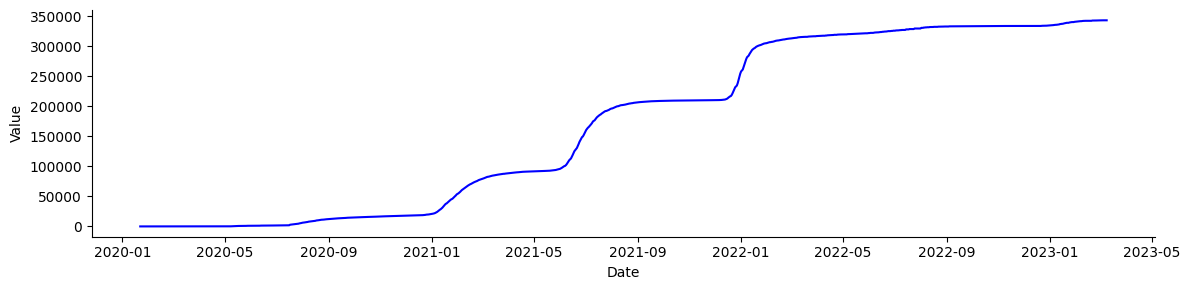

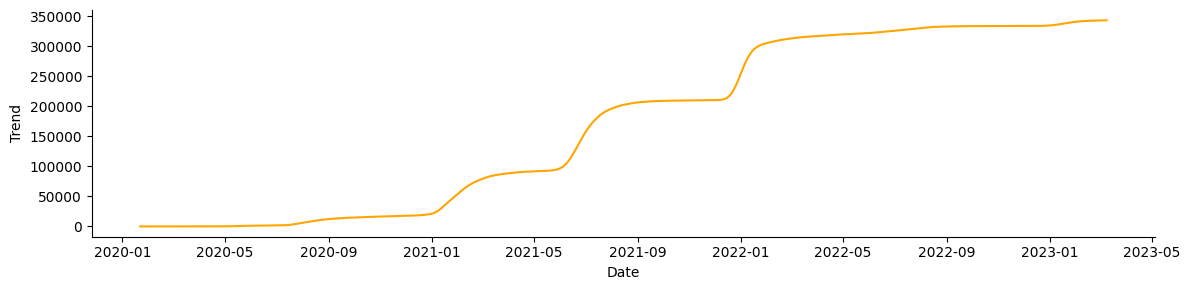

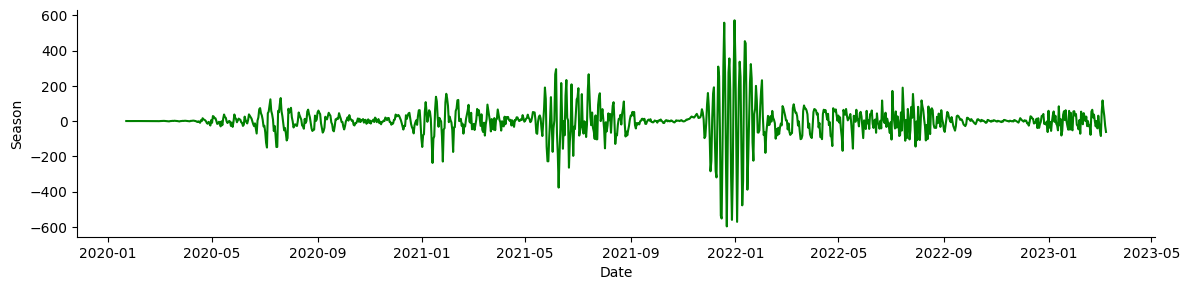

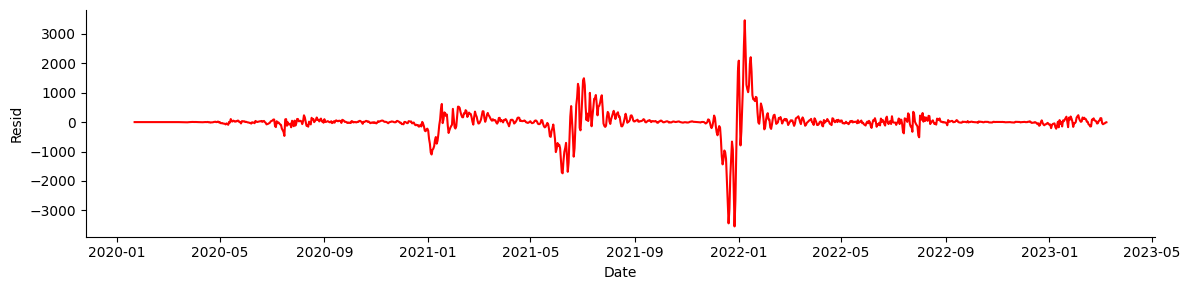

In [21]:
[sns.relplot(x=df_melt['Date'], y=df_melt[col], kind='line', height=3, aspect=4, color=color) 
 for col, color in [('Value', 'blue'), ('Trend', 'orange'), ('Season', 'green'), ('Resid', 'red')]];

## 2
- Используйте данные о продажах из Global Superstore Sales (Kaggle). 
- Проанализируйте сезонность продаж по месяцам с помощью метода STL и постройте график сезонных колебаний в разных категориях товаров.

In [23]:
df = pd.read_csv('../data/04-2-global-superstore2.csv', encoding='cp1251')
df_target = df[['Order Date', 'Category']].copy()
df_target.rename(columns={'Order Date':'OrderDate'}, inplace=True)
df_target['OrderDate'] = pd.to_datetime(df_target['OrderDate'])
df_target['OrderMonth'] = df_target['OrderDate'].dt.month

df_target.sample(10)

/var/folders/wb/4g8jd0z5523_swmb10tb_k7c0000gn/T/ipykernel_4678/1829224657.py:4: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_target['OrderDate'] = pd.to_datetime(df_target['OrderDate'])


,OrderDate,Category,OrderMonth
30139,2014-01-06,Office Supplies,1
5450,2013-03-27,Technology,3
43462,2012-09-10,Office Supplies,9
46068,2013-03-13,Office Supplies,3
36397,2014-11-27,Technology,11
44296,2012-09-07,Office Supplies,9
42439,2013-11-22,Office Supplies,11
32472,2014-10-03,Office Supplies,10
48641,2014-04-18,Office Supplies,4
12896,2014-10-01,Technology,10


In [ ]:
# Считаем заказы по дню
df_target_by_day = df_target.groupby(['Category', 'OrderDate']).agg(Count=('OrderDate', 'count')).reset_index()

for cat in df_target_by_day['Category'].unique():
    mask = df_target_by_day['Category'] == cat
    sample = df_target_by_day[mask]

    stl = statsmodels.tsa.seasonal.STL(sample['Count'], period=12)
    result = stl.fit()

    df_target_by_day.loc[mask, 'Season'] = result.seasonal



,Category,OrderDate,Count,Season
0,Furniture,2011-01-01,1,-2.093022
1,Furniture,2011-01-03,5,-0.484583
2,Furniture,2011-01-04,2,-0.318682
3,Furniture,2011-01-05,1,0.431460
4,Furniture,2011-01-06,1,-1.080764
...,...,...,...,...
4079,Technology,2014-12-27,11,-5.390294
4080,Technology,2014-12-28,3,-5.618637
4081,Technology,2014-12-29,14,-1.146028
4082,Technology,2014-12-30,8,-4.368590


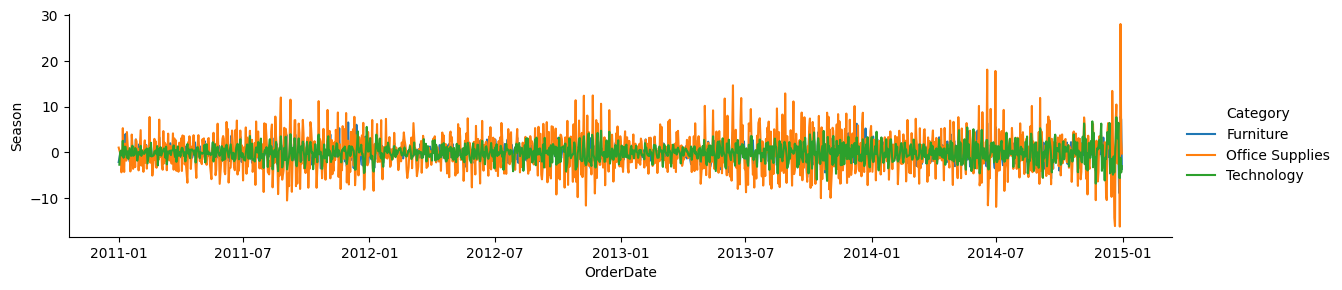

In [32]:
sns.relplot(data=df_target_by_day, x='OrderDate', y='Season', kind='line', hue='Category', height=3, aspect=4);